# (1) Libraries

In [3]:
#---------------------------------------------------------------------------
# importing libraries
#---------------------------------------------------------------------------

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import missingno as msno

from sklearn.impute import SimpleImputer

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import PrecisionRecallCurve


# (2) Creating the Classification Reports

### Confusion Matrix Chart

Links for reference:
* https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [6]:
#it is not in use now, replaced by the yellowbrick to keep the same visual identity.
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    #classes = classes
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

### Generating the Classification Reports

Links for reference:
* colors https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
* Yellow Brick = https://www.scikit-yb.org/en/latest/api/classifier/index.html

In [7]:
def get_classificationReportDecisionTree(x_train, x_test, y_train, y_test, classes):
    '''
    This function is trainning the model with the received parameters.
    Then it evaluate the results of prediction and print/plot the Reports: 
        ClassificationReport, ConfusionMatrix, ClassPredictionError, and PrecisionRecallCurve.
    
    It is using the yellowbrick.classifier library.
    
    The split of the dataset is happening out of this function to make sure 
    all the reports will be using the same data, for comparison purposes.
    
    @param x_train: contains the training features
    @param x_test: contains the testing features
    @param y_train: contains the training label
    @param y_test: contains the testing labels   
    @param classes: contains the list of classes/labels   
    
    @return: none (it is using print + yellowbrick plot)
    '''    
    
    #Creating the model
    model=tree.tree.DecisionTreeClassifier()
    model.fit(x_train, y_train)

    #Getting the predictions from the trained model
    y_pred = model.predict(x_test)

    #Showing the Classification Report (Text)
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    
    #Showing the Classification Report (Chart)
    visualizer = ClassificationReport(model, classes=classes, cmap='RdBu', support=True)
    visualizer.fit(x_train, y_train)  # Fit the visualizer and the model
    visualizer.score(x_test, y_test)  # Evaluate the model on the test data
    visualizer.poof()                 # Draw/show/poof the data    
    
    # The ConfusionMatrix visualizer taxes a model
    print('--------------------------------------------------------------------------------')     
    print('Confusion Matrix')
    #cm = ConfusionMatrix(model, classes=classes, label_encoder={0: 'setosa', 1: 'versicolor', 2: 'virginica'})
    cm = ConfusionMatrix(model, classes=classes, cmap='RdBu')
    cm.fit(x_train, y_train)  # Fit the visualizer and the model
    cm.score(x_test, y_test)  # Evaluate the model on the test data
    cm.poof()
    
    # The Class Prediction Error Distribution
    print('--------------------------------------------------------------------------------')     
    print('Class Prediction Error Distribution')
    cp = ClassPredictionError(model, classes=classes)
    cp.fit(x_train, y_train)  # Fit the visualizer and the model
    cp.score(x_test, y_test)  # Evaluate the model on the test data
    cp.poof()

    # Precision-Recall Curves
    print('--------------------------------------------------------------------------------')     
    print('Precision-Recall Curves')
    if (classes.size > 2):
        print('(To support multi-label classification, the estimator is wrapped in a OneVsRestClassifier to produce binary comparisons for each class. The Precision-Recall curve is then computed as the micro-average of the precision and recall for all classes)')
    pc = PrecisionRecallCurve(model, classes=classes)
    pc.fit(x_train, y_train)  # Fit the visualizer and the model
    pc.score(x_test, y_test)  # Evaluate the model on the test data
    pc.poof()    

    # Precision-Recall Curves Multi-Label Classification  
    if (classes.size > 2):
        print('--------------------------------------------------------------------------------')     
        print('Precision-Recall Curves (displaying the each curve individually, along with F1-score ISO curves)')
        pc = PrecisionRecallCurve(model, per_class=True, iso_f1_curves=True, fill_area=False, micro=False)
        pc.fit(x_train, y_train)  # Fit the visualizer and the model
        pc.score(x_test, y_test)  # Evaluate the model on the test data
        pc.poof()     
    
    #Showing the confusion matrix (Chart) ***Alternative to YellowBrick code above
    #print('--------------------------------------------------------------------------------')  
    #plot_confusion_matrix(y_test, y_pred, title='Confusion matrix, without normalization:')
    #print(' ')
    #plot_confusion_matrix(y_test, y_pred, normalize=True, title='Normalized confusion matrix:')
    
    return 

### Main function to compare the missing imputation stategies 

Links for reference:
* 

In [8]:
def get_ComparisonDecisionTree(dataset):
    
    '''
    This function is receiving the dataset (Pandas daframe) and the main actions are:
        1) validate if the dataset has missing values, in case not then generate missing values
        2) run the baseline = classification without any missing values
        3) run the model/classification for each preprocessing strategy
        4) plot all the details/results
            
    @param dataset: contains the dataset to be evaluated
    
    @return: none (it is using print + the output of other functions)
    '''       
    
    #---------------------------------------------------------------------------       
    # Pending implementation:
    # *** confirm if the y label is string, in case yes, then change to numbers 
    # *** review the code for classes variable  
    #---------------------------------------------------------------------------
    
    
    #---------------------------------------------------------------------------
    # variables
    #---------------------------------------------------------------------------
    is_missing = dataset.isnull().values.any()
    X_full = np.array(dataset.iloc[:,:-1])
    y_full = np.array(dataset.iloc[:,-1])  
    
    # *** review after the latest code changes!
    y = pd.DataFrame(y_full)
    classes = y[0].unique()
           
        
    #---------------------------------------------------------------------------    
    # Baseline    
    # The Baseline are running with a different split of train and test data!!!!
    #---------------------------------------------------------------------------    
    
    print(' ')    
    print('================================================================================')
    print('================================================================================')
    print('Classification Results for Baseline')  
    print('================================================================================')
    print('================================================================================')
    print(' ')     
    print('--------------------------------------------------------------------------------')
    
    # Check if the original dataset has missing values
    if (is_missing==False):
        
        # In case of the original dataset without missing (e.g., iris) then use it as is to run the baseline
        x_trainB, x_testB, y_trainB, y_testB = train_test_split(X_full, y_full, test_size=0.30)
        x_train0 = pd.DataFrame(x_trainB)
        x_test0 = pd.DataFrame(x_testB)          
        get_classificationReportDecisionTree(x_train0, x_test0, y_trainB, y_testB, classes)                 
        
        #---------------------------------------------------------------------------
        # Add missing values in 75% of the lines randomly 
        #---------------------------------------------------------------------------        
        n_samples = X_full.shape[0]
        n_features = X_full.shape[1]
        rng = np.random.RandomState(0)      
        missing_rate = 0.75
        
        n_missing_samples = int(np.floor(n_samples * missing_rate))
        missing_samples = np.hstack((np.zeros(n_samples - n_missing_samples, dtype=np.bool),
                                         np.ones(n_missing_samples,dtype=np.bool)))
        rng.shuffle(missing_samples)
        missing_features = rng.randint(0, n_features, n_missing_samples)
        X_missing = X_full.copy()
        X_missing[np.where(missing_samples)[0], missing_features] = np.nan    
    
    else:        

        # If originall missing data then clean all this lines and run baseline
        df_clean = dataset.dropna()
        X_baseline = np.array(df_clean.iloc[:,:-1])
        y_baseline = np.array(df_clean.iloc[:,-1])  
        x_trainB, x_testB, y_trainB, y_testB = train_test_split(X_baseline, y_baseline, test_size=0.30)
        #*** review after the latest code changes! acho que nao precisa mais disso - pode passar direto!
        x_train0 = pd.DataFrame(x_trainB)
        x_test0 = pd.DataFrame(x_testB)  
        get_classificationReportDecisionTree(x_train0, x_test0, y_trainB, y_testB, classes)
                
        #All the other tests will continue with the same variable name
        X_missing = X_full.copy()
                
    #No Changes to the class/label column   
    y_missing = y_full.copy()
    
    
    #---------------------------------------------------------------------------  
    # Spliting the data of training (70%) and test (30%)
    # Same set of data for all preprocessing comparisons! =)
    #---------------------------------------------------------------------------    
    x_train, x_test, y_train, y_test = train_test_split(X_missing, y_missing, test_size=0.30)
       
        
    #---------------------------------------------------------------------------
    # Generating the missing values matrix prior to the imputation strategies
    #---------------------------------------------------------------------------    
    df = pd.DataFrame(X_missing)  # Rever!! poderia chamar direto "dataset"?? so no caso iris
    #msno.matrix(df)  #Gera bug com o gerenciamento do ax dos graficos se colocado no inicio.
    print(' ') 
    print(' ')    
    print('================================================================================')    
    print('================================================================================')
    print('Classification Results with Missing Values')  
    print('================================================================================')
    print('================================================================================')    
    print(' ')    
    #print('Sample of records for the dataset with missing values:')
    #print(df.head())


    #---------------------------------------------------------------------------
    # replacing missing values by 0
    # If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.
    #---------------------------------------------------------------------------
    imp1 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
    x_train1 = pd.DataFrame(imp1.fit_transform(x_train)) # Rever!! pq transforma pandas?
    x_test1 = pd.DataFrame(imp1.fit_transform(x_test))  
    print(' ')    
    print('================================================================================')
    print('Stategy 1 - Constant Imputation (=zero)')   
    print('================================================================================')
    print(' ') 
    #print('Sample of training records:')
    #print(x_train1.head())
    print('--------------------------------------------------------------------------------')
    get_classificationReportDecisionTree(x_train1, x_test1, y_train, y_test, classes)


    #---------------------------------------------------------------------------
    # Imputation (mean strategy) of the missing values
    # If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.
    #---------------------------------------------------------------------------
    imp2 = SimpleImputer(missing_values=np.nan, strategy="mean")
    x_train2 = pd.DataFrame(imp2.fit_transform(x_train)) # Rever!! pq transforma pandas?
    x_test2 = pd.DataFrame(imp2.fit_transform(x_test))    
    print(' ')   
    print('================================================================================')
    print('Stategy 2 - Mean Imputation')      
    print('================================================================================')
    print(' ') 
    #print('Sample of training records:')
    #print(x_train2.head())
    print('--------------------------------------------------------------------------------')
    get_classificationReportDecisionTree(x_train2, x_test2, y_train, y_test, classes)


    #---------------------------------------------------------------------------
    # Estimate the score after imputation (median strategy) of the missing values
    # If “median”, then replace missing values using the median along each column. Can only be used with numeric data.
    #---------------------------------------------------------------------------
    imp3 = SimpleImputer(missing_values=np.nan, strategy="median")
    x_train3 = pd.DataFrame(imp3.fit_transform(x_train)) # Rever!! pq transforma pandas?
    x_test3 = pd.DataFrame(imp3.fit_transform(x_test))     
    print(' ')    
    print('================================================================================')
    print('Strategy 3 - Median Imputation')        
    print('================================================================================')
    print(' ')       
    #print('Sample of training records:')
    #print(x_train3.head())
    print('--------------------------------------------------------------------------------')
    get_classificationReportDecisionTree(x_train3, x_test3, y_train, y_test, classes)


    #---------------------------------------------------------------------------
    # Estimate the score after imputation (most_frequent strategy) of the missing values
    # If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data.
    #---------------------------------------------------------------------------
    imp4 = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    x_train4 = pd.DataFrame(imp4.fit_transform(x_train)) # Rever!! pq transforma pandas?
    x_test4 = pd.DataFrame(imp4.fit_transform(x_test))    
    print(' ')    
    print('================================================================================')
    print('Strategy 4 - Most Frequent Imputation')          
    print('================================================================================')
    print(' ')   
    #print('Sample of training records:')
    #print(x_train4.head())
    print('--------------------------------------------------------------------------------')
    get_classificationReportDecisionTree(x_train4, x_test4, y_train, y_test, classes)

    print(' ') 
    print(' ')    
    print('================================================================================')
    print('Matrix visualization of the nullity of the given dataset') 
    if is_missing==False:
        print('(Missing values were added randomly in 75% of the lines)')  
    print('================================================================================')
    msno.matrix(df)

    return 

# (3) *pending* - Code related to the Preprocessing metada dataframe

### Function Declarations

In [162]:
#Function to create the column names
def fLabelsGenerator(qtdElements, label, considerCombination=True):
    '''
    parameters: qtdElements = distinct count of categories/class
                label = name to be assigned to items
                considerCombination = generated label*label items
    return: list of qtdElements with specified label + the number of ocurrence
    '''

    nElem = [i for i in range(qtdElements)]
    n = [i for i in range(qtdElements)] 
    rList =[]

    if considerCombination:
        for x in n:
            for y in nElem:
                rList.append(label +'_'+ str(x) + '_to_' + str(y))
                #print (a)
    else:
        for x in n:
            rList.append(label +'_'+ str(x) )
    
    return rList

In [163]:
#function to compare the actual versus the preditic and calculate the totals and percentages
def fComparator(X,listA,listB):
    '''
    parameters: X - original list with data values
                listA y - with 1st classification
                listB - the other list to compare
                
    return: array with possible combinations + total in each combination + elements that changed
    '''        
    
    # generates a list of distinct elements in A
    distinct =[]
    ite = listA
    Xlength =len(X)
    
    for w in ite:
        try:
            a =distinct.index(w) # tries to add the new item to a fake variable. if cannot find the index on the array it gives an exception 
        except ValueError:     
            distinct.append(w)  #exception adds the value
    
    #-----------
    #create array to store results like this ['00',0,0,[]]  combination, total, percentage, position of diferent items found
    m = [i for i in range(0,len(distinct))]
    n = [i for i in range(0,len(distinct))] 
    lComparison =[]
    
    for j in m:
        for k in n:
            lComparison.append([str(j) +str(k),0,0,[]])  #creates an array 
    #-----------
    
    #goes in parallel through listA and listB generating a pair e.g. '00','01','22'
    #and searches the correspondent value in lComparison to increment the total and
    #add the X value in case of changing from an value to another e.g. '21'
    
    for index, itemA in enumerate(listA): 
        
        for lCompSub in lComparison:  
            #if found the relative movment made from listA to listB in lComparsion increments the counter 
            #if there is a change from A to B  adds the X value too 
            if len(listB)==0:  # if does not exists listB assumes the same value in listA
                bToCompare = int(itemA)
            else:
                bToCompare = int(listB[index])
              
            if lCompSub[0] == str(int(itemA))+str(bToCompare): #compares just the str value '00'
                lComparison[lComparison.index(lCompSub)][1]+=1
                if lCompSub[0][0:1]!=lCompSub[0][1:2]:
                    lComparison[lComparison.index(lCompSub)][3].append([index,X[index]])
    
    for lCombSub in lComparison:  
        if lCombSub[1]!=0:
            lCombSub[2]=round((lCombSub[1] / Xlength) * 100 , 2)
          
    return lComparison

In [164]:
#function to list the distinct labels of the classes
def fTotalClass(lis):
    unique, counts = np.unique(lis, return_counts=True)
    return dict(zip(unique, counts))

In [170]:
#function to add the data to the preprocessing metadata dataframe 
def fPopulate(nRound, accuracyScore, groupTotalLabel,totalLabel, percLabel, prep_notes, x, comp1ActualTest, comp2Predictions):
    '''
    parameters: nRound = round number of the preprocessing execution
                accuracyScore = acuracia da classificacao
                groupTotalLabel = string with the name of the columns regarding the total number of elements per class 
                totalLabel = string with the name of the columns regarding the total of classes from one class to another
                percLabel = string with the name of the columns regarding the percentage of classes from one class to another
                prep_notes = string with notes regarding the round of preprocessing
                compTotal = original list
                comp1 = actual/original class/label of each instance 
                comp2 = predicted/new class/label of each instance
    return: none (populate the dataframe)
    '''    
    counter = 1

    df_prep.at[nRound, 'prep_round']= nRound
    df_prep.at[nRound, 'prep_notes']= prep_notes
    df_prep.at[nRound, 'accuracy_score']= accuracyScore
        
    for it in fTotalClass(comp1ActualTest).values():
        df_prep.at[nRound, groupTotalLabel+'_'+str(counter-1)]= it
        counter += 1

    for it in fComparator(x,comp1ActualTest,comp2Predictions):
        df_prep.at[nRound, totalLabel+'_'+it[0][0:1]+'_to_'+it[0][1:2] ]= it[1]
        df_prep.at[nRound, percLabel +'_'+it[0][0:1]+'_to_'+it[0][1:2] ]= it[1]
  
    return

In [211]:
#function to generate the sankey diagram
#WIP

from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

layout = Layout(width="500", height="500")

def sankey(margin_top=10, **value):
    """Show SankeyWidget with default values for size and margins"""
    return SankeyWidget(layout=layout,
                        margins=dict(top=60, bottom=60, left=60, right=60),
                        **value)


def createSankey(df_prep,index_aft):
    nodes = [
        {'id': 'n1', 'title': 'Class 0', 'style': 'process' },
        {'id': 'n2', 'title': 'Class 1', 'style': 'process' },  
        {'id': 'n3', 'title': 'Class 2', 'style': 'process' },      
        {'id': 'n4', 'title': 'Class 0', 'style': 'process' },       
        {'id': 'n5', 'title': 'Class 1', 'style': 'process' },  
        {'id': 'n6', 'title': 'Class 2', 'style': 'process' },      
    ]
    links = [
        {'source': 'n1', 'target': 'n4', 'value': df_prep.at[index_aft,'perc_0_to_0'], 'color': 'steelblue'},
        {'source': 'n1', 'target': 'n5', 'value': df_prep.at[index_aft,'perc_0_to_1'], 'color': 'goldenrod'},    
        {'source': 'n1', 'target': 'n6', 'value': df_prep.at[index_aft,'perc_0_to_2'], 'color': 'goldenrod'},

        {'source': 'n2', 'target': 'n4', 'value': df_prep.at[index_aft,'perc_1_to_0'], 'color': 'goldenrod'},
        {'source': 'n2', 'target': 'n5', 'value': df_prep.at[index_aft,'perc_1_to_1'], 'color': 'steelblue'}, 
        {'source': 'n2', 'target': 'n6', 'value': df_prep.at[index_aft,'perc_1_to_2'], 'color': 'goldenrod'},

        {'source': 'n3', 'target': 'n4', 'value': df_prep.at[index_aft,'perc_2_to_0'], 'color': 'goldenrod'},
        {'source': 'n3', 'target': 'n5', 'value': df_prep.at[index_aft,'perc_2_to_1'], 'color': 'goldenrod'},
        {'source': 'n3', 'target': 'n6', 'value': df_prep.at[index_aft,'perc_2_to_2'], 'color': 'steelblue'}, 
    ]
    groups = [
        {'id': 'g1', 'title': 'Actual', 'nodes': ['n1', 'n2', 'n3']},
        {'id': 'g2', 'title': 'Predicted', 'nodes': ['n4', 'n5', 'n6']},
    ]
    return sankey(nodes=nodes,links=links,groups=groups)


In [212]:
##############testing/debuging##############
df_prep

,prep_round,prep_notes,accuracy_score,total_class_0,total_class_1,total_class_2,total_0_to_0,total_0_to_1,total_0_to_2,total_1_to_0,...,total_2_to_2,perc_0_to_0,perc_0_to_1,perc_0_to_2,perc_1_to_0,perc_1_to_1,perc_1_to_2,perc_2_to_0,perc_2_to_1,perc_2_to_2
1,1,prep_notes,0.955556,15,11,19,15,0,0,0,...,17,15,0,0,0,11,0,0,2,17
2,2,prep_notes,0.933333,13,20,12,13,0,0,0,...,10,13,0,0,0,19,1,0,2,10
3,3,prep_notes,1,15,15,15,15,0,0,0,...,15,15,0,0,0,15,0,0,0,15
4,4,prep_notes,0.933333,13,14,18,13,0,0,0,...,15,13,0,0,0,14,0,0,3,15
5,5,prep_notes,0.866667,16,16,13,16,0,0,0,...,11,16,0,0,0,12,4,0,2,11


In [222]:
##############testing/debuging##############

print(createSankey(df_prep,1))

createSankey(df_prep,1)

SankeyWidget(groups=[{'id': 'g1', 'title': 'Actual', 'nodes': ['n1', 'n2', 'n3']}, {'id': 'g2', 'title': 'Predicted', 'nodes': ['n4', 'n5', 'n6']}], layout=Layout(height='500', width='500'), links=[{'source': 'n1', 'target': 'n4', 'value': 16, 'color': 'steelblue'}, {'source': 'n1', 'target': 'n5', 'value': 0, 'color': 'goldenrod'}, {'source': 'n1', 'target': 'n6', 'value': 0, 'color': 'goldenrod'}, {'source': 'n2', 'target': 'n4', 'value': 0, 'color': 'goldenrod'}, {'source': 'n2', 'target': 'n5', 'value': 12, 'color': 'steelblue'}, {'source': 'n2', 'target': 'n6', 'value': 2, 'color': 'goldenrod'}, {'source': 'n3', 'target': 'n4', 'value': 0, 'color': 'goldenrod'}, {'source': 'n3', 'target': 'n5', 'value': 1, 'color': 'goldenrod'}, {'source': 'n3', 'target': 'n6', 'value': 14, 'color': 'steelblue'}], margins={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, nodes=[{'id': 'n1', 'title': 'Class 0', 'style': 'process'}, {'id': 'n2', 'title': 'Class 1', 'style': 'process'}, {'id': 'n3'

SankeyWidget(groups=[{'id': 'g1', 'title': 'Actual', 'nodes': ['n1', 'n2', 'n3']}, {'id': 'g2', 'title': 'Pred…

### Creating the preprocessing metadata

In [171]:
#creating the structure for the preprocessing metadata dataframe

#list of variables to support with the name of the columns creation
distinctCountClass = 3 #to be adjusted, this variable should come from the other function!
groupTotalLabel = 'total_class'
totalLabel = 'total'
percLabel = 'perc'

#defining the first columns *initially it is the same to all datasets under evaluation
labels = ['prep_round','prep_notes','accuracy_score'] 
labels.extend(fLabelsGenerator(distinctCountClass, label=groupTotalLabel, considerCombination=False ))
labels.extend(fLabelsGenerator(distinctCountClass, label=totalLabel))
labels.extend(fLabelsGenerator(distinctCountClass, label=percLabel))    
  
#transforming the array of columns in a dataframe
df_prep = pd.DataFrame(columns=labels)

In [172]:
##############testing/debuging##############
df_prep

,prep_round,prep_notes,accuracy_score,total_class_0,total_class_1,total_class_2,total_0_to_0,total_0_to_1,total_0_to_2,total_1_to_0,...,total_2_to_2,perc_0_to_0,perc_0_to_1,perc_0_to_2,perc_1_to_0,perc_1_to_1,perc_1_to_2,perc_2_to_0,perc_2_to_1,perc_2_to_2


In [216]:
##############testing/debuging##############
iris = pd.read_csv("/home/owner/workspace/datasets/iris.csv", encoding='UTF-8')
# Change categorical data to number 0-2
iris["species"] = pd.Categorical(iris["species"])
iris["species"] = iris["species"].cat.codes
x = np.array(iris.iloc[:,:-1])
y = np.array(iris.iloc[:,-1])

for i in range(1,6):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)
    classifier=tree.DecisionTreeClassifier()
    classifier.fit(x_train,y_train)
    predictions=classifier.predict(x_test)
    accuracyScore = accuracy_score(y_test,predictions)

    print('=====================================================')   
    print('Iteration = ', i)
    print('accuracy_score = ', accuracyScore)
    print('-----------------------------------------------------')
    print('fTotalClass(y) = ', fTotalClass(y))
    print('fTotalClass(predictions) = ', fTotalClass(predictions))
    print('fTotalClass(y_test) = ', fTotalClass(y_test))
    print('fTotalClass(y_train) = ', fTotalClass(y_train))

    fPopulate(i, accuracyScore, groupTotalLabel, totalLabel, percLabel, 'prep_notes', x, y_test, predictions)
    #createSankey(df_prep,i)

df_prep

Iteration =  1
accuracy_score =  0.9333333333333333
-----------------------------------------------------
fTotalClass(y) =  {0: 50, 1: 50, 2: 50}
fTotalClass(predictions) =  {0: 16, 1: 13, 2: 16}
fTotalClass(y_test) =  {0: 16, 1: 14, 2: 15}
fTotalClass(y_train) =  {0: 34, 1: 36, 2: 35}
Iteration =  2
accuracy_score =  0.9333333333333333
-----------------------------------------------------
fTotalClass(y) =  {0: 50, 1: 50, 2: 50}
fTotalClass(predictions) =  {0: 15, 1: 15, 2: 15}
fTotalClass(y_test) =  {0: 15, 1: 14, 2: 16}
fTotalClass(y_train) =  {0: 35, 1: 36, 2: 34}
Iteration =  3
accuracy_score =  0.9333333333333333
-----------------------------------------------------
fTotalClass(y) =  {0: 50, 1: 50, 2: 50}
fTotalClass(predictions) =  {0: 20, 1: 10, 2: 15}
fTotalClass(y_test) =  {0: 20, 1: 11, 2: 14}
fTotalClass(y_train) =  {0: 30, 1: 39, 2: 36}
Iteration =  4
accuracy_score =  0.9555555555555556
-----------------------------------------------------
fTotalClass(y) =  {0: 50, 1: 50, 

,prep_round,prep_notes,accuracy_score,total_class_0,total_class_1,total_class_2,total_0_to_0,total_0_to_1,total_0_to_2,total_1_to_0,...,total_2_to_2,perc_0_to_0,perc_0_to_1,perc_0_to_2,perc_1_to_0,perc_1_to_1,perc_1_to_2,perc_2_to_0,perc_2_to_1,perc_2_to_2
1,1,prep_notes,0.933333,16,14,15,16,0,0,0,...,14,16,0,0,0,12,2,0,1,14
2,2,prep_notes,0.933333,15,14,16,15,0,0,0,...,14,15,0,0,0,13,1,0,2,14
3,3,prep_notes,0.933333,20,11,14,20,0,0,0,...,13,20,0,0,0,9,2,0,1,13
4,4,prep_notes,0.955556,13,17,15,13,0,0,0,...,14,13,0,0,0,16,1,0,1,14
5,5,prep_notes,0.955556,14,18,13,14,0,0,0,...,13,14,0,0,0,16,2,0,0,13


In [221]:
##############testing/debuging##############

for i in range(1,6):
    print(createSankey(df_prep,i))
    print('--------------------------')
    createSankey(df_prep,i)
        

SankeyWidget(groups=[{'id': 'g1', 'title': 'Actual', 'nodes': ['n1', 'n2', 'n3']}, {'id': 'g2', 'title': 'Predicted', 'nodes': ['n4', 'n5', 'n6']}], layout=Layout(height='500', width='500'), links=[{'source': 'n1', 'target': 'n4', 'value': 16, 'color': 'steelblue'}, {'source': 'n1', 'target': 'n5', 'value': 0, 'color': 'goldenrod'}, {'source': 'n1', 'target': 'n6', 'value': 0, 'color': 'goldenrod'}, {'source': 'n2', 'target': 'n4', 'value': 0, 'color': 'goldenrod'}, {'source': 'n2', 'target': 'n5', 'value': 12, 'color': 'steelblue'}, {'source': 'n2', 'target': 'n6', 'value': 2, 'color': 'goldenrod'}, {'source': 'n3', 'target': 'n4', 'value': 0, 'color': 'goldenrod'}, {'source': 'n3', 'target': 'n5', 'value': 1, 'color': 'goldenrod'}, {'source': 'n3', 'target': 'n6', 'value': 14, 'color': 'steelblue'}], margins={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, nodes=[{'id': 'n1', 'title': 'Class 0', 'style': 'process'}, {'id': 'n2', 'title': 'Class 1', 'style': 'process'}, {'id': 'n3'

In [175]:
##############testing/debuging##############
fComparator(x, y_test, predictions.tolist())

[['00', 16, 10.67, []],
 ['01', 0, 0, []],
 ['02', 0, 0, []],
 ['10', 0, 0, []],
 ['11', 12, 8.0, []],
 ['12',
  4,
  2.67,
  [[2, array([4.7, 3.2, 1.3, 0.2])],
   [13, array([4.3, 3. , 1.1, 0.1])],
   [18, array([5.7, 3.8, 1.7, 0.3])],
   [36, array([5.5, 3.5, 1.3, 0.2])]]],
 ['20', 0, 0, []],
 ['21',
  2,
  1.33,
  [[9, array([4.9, 3.1, 1.5, 0.1])], [30, array([4.8, 3.1, 1.6, 0.2])]]],
 ['22', 11, 7.33, []]]

# (4) Loading Dataset

## Dataset - Multi-Label Classification (Iris)

Getting the original dataset and adding randomly the missing data for evaluation

 
Classification Results for Baseline
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.93      0.90        15
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



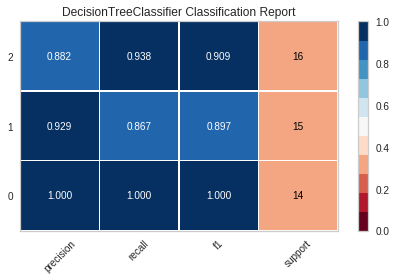

--------------------------------------------------------------------------------
Confusion Matrix


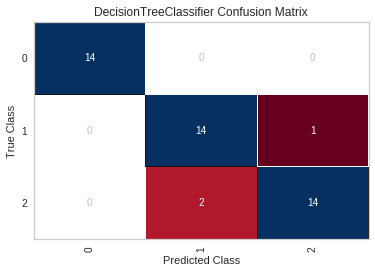

--------------------------------------------------------------------------------
Class Prediction Error Distribution


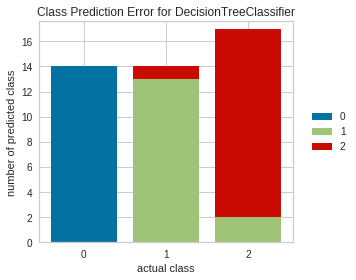

--------------------------------------------------------------------------------
Precision-Recall Curves
(To support multi-label classification, the estimator is wrapped in a OneVsRestClassifier to produce binary comparisons for each class. The Precision-Recall curve is then computed as the micro-average of the precision and recall for all classes)


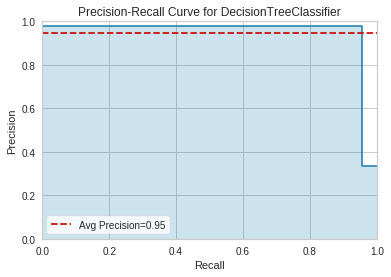

--------------------------------------------------------------------------------
Precision-Recall Curves (displaying the each curve individually, along with F1-score ISO curves)


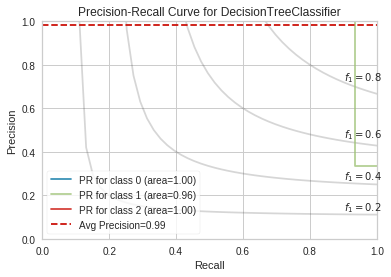

 
 
Classification Results with Missing Values
 
 
Stategy 1 - Constant Imputation (=zero)
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.76      0.87        17
           2       0.75      1.00      0.86        12

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.91        45
weighted avg       0.93      0.91      0.91        45



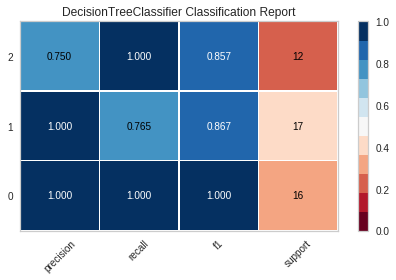

--------------------------------------------------------------------------------
Confusion Matrix


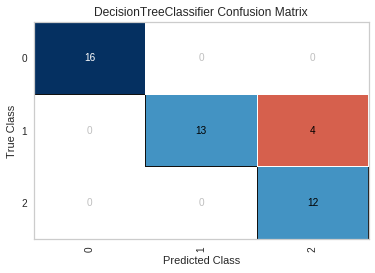

--------------------------------------------------------------------------------
Class Prediction Error Distribution


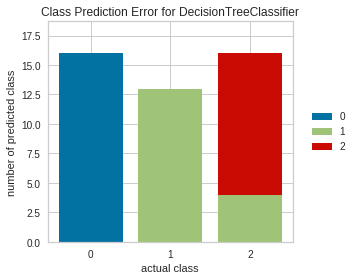

--------------------------------------------------------------------------------
Precision-Recall Curves
(To support multi-label classification, the estimator is wrapped in a OneVsRestClassifier to produce binary comparisons for each class. The Precision-Recall curve is then computed as the micro-average of the precision and recall for all classes)


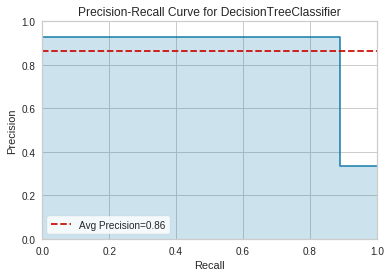

--------------------------------------------------------------------------------
Precision-Recall Curves (displaying the each curve individually, along with F1-score ISO curves)


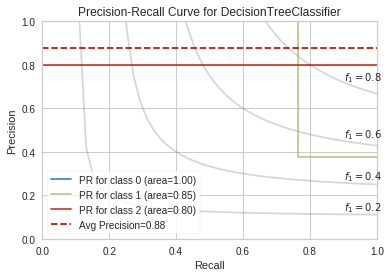

 
Stategy 2 - Mean Imputation
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.82      0.90        17
           2       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



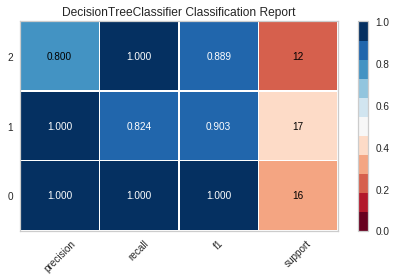

--------------------------------------------------------------------------------
Confusion Matrix


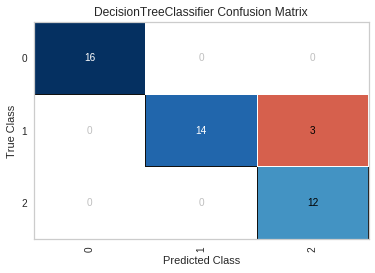

--------------------------------------------------------------------------------
Class Prediction Error Distribution


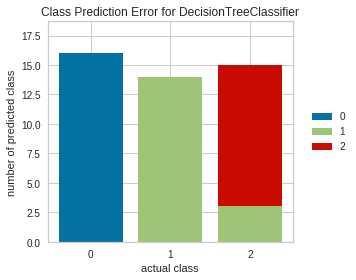

--------------------------------------------------------------------------------
Precision-Recall Curves
(To support multi-label classification, the estimator is wrapped in a OneVsRestClassifier to produce binary comparisons for each class. The Precision-Recall curve is then computed as the micro-average of the precision and recall for all classes)


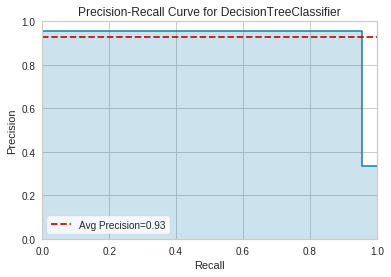

--------------------------------------------------------------------------------
Precision-Recall Curves (displaying the each curve individually, along with F1-score ISO curves)


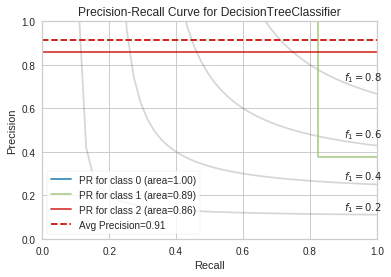

 
Strategy 3 - Median Imputation
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.82      0.90        17
           2       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



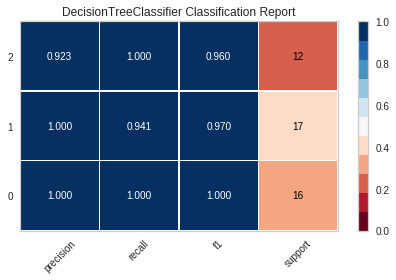

--------------------------------------------------------------------------------
Confusion Matrix


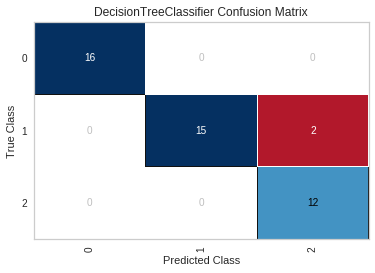

--------------------------------------------------------------------------------
Class Prediction Error Distribution


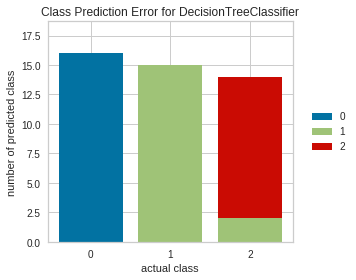

--------------------------------------------------------------------------------
Precision-Recall Curves
(To support multi-label classification, the estimator is wrapped in a OneVsRestClassifier to produce binary comparisons for each class. The Precision-Recall curve is then computed as the micro-average of the precision and recall for all classes)


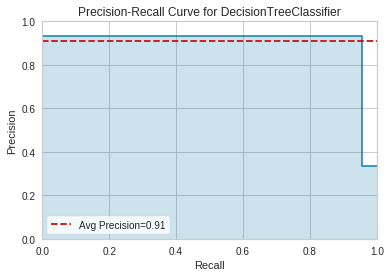

--------------------------------------------------------------------------------
Precision-Recall Curves (displaying the each curve individually, along with F1-score ISO curves)


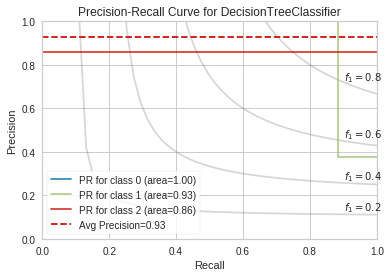

 
Strategy 4 - Most Frequent Imputation
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.76      0.87        17
           2       0.75      1.00      0.86        12

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.91        45
weighted avg       0.93      0.91      0.91        45



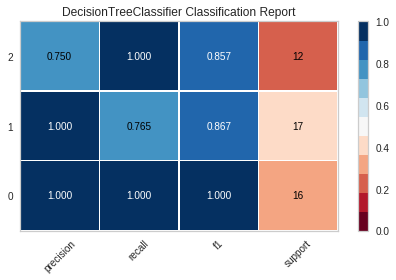

--------------------------------------------------------------------------------
Confusion Matrix


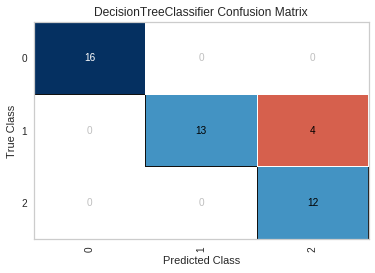

--------------------------------------------------------------------------------
Class Prediction Error Distribution


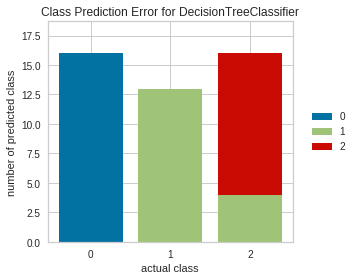

--------------------------------------------------------------------------------
Precision-Recall Curves
(To support multi-label classification, the estimator is wrapped in a OneVsRestClassifier to produce binary comparisons for each class. The Precision-Recall curve is then computed as the micro-average of the precision and recall for all classes)


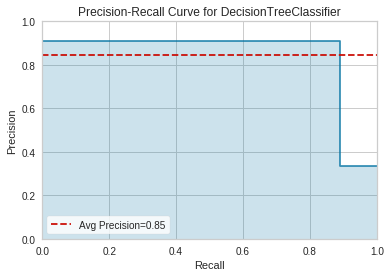

--------------------------------------------------------------------------------
Precision-Recall Curves (displaying the each curve individually, along with F1-score ISO curves)


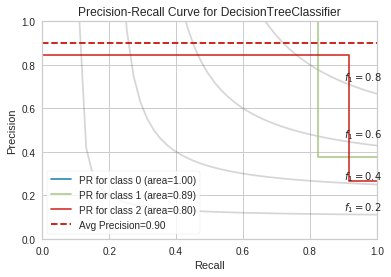

 
 
Matrix visualization of the nullity of the given dataset
(Missing values were added randomly in 75% of the lines)


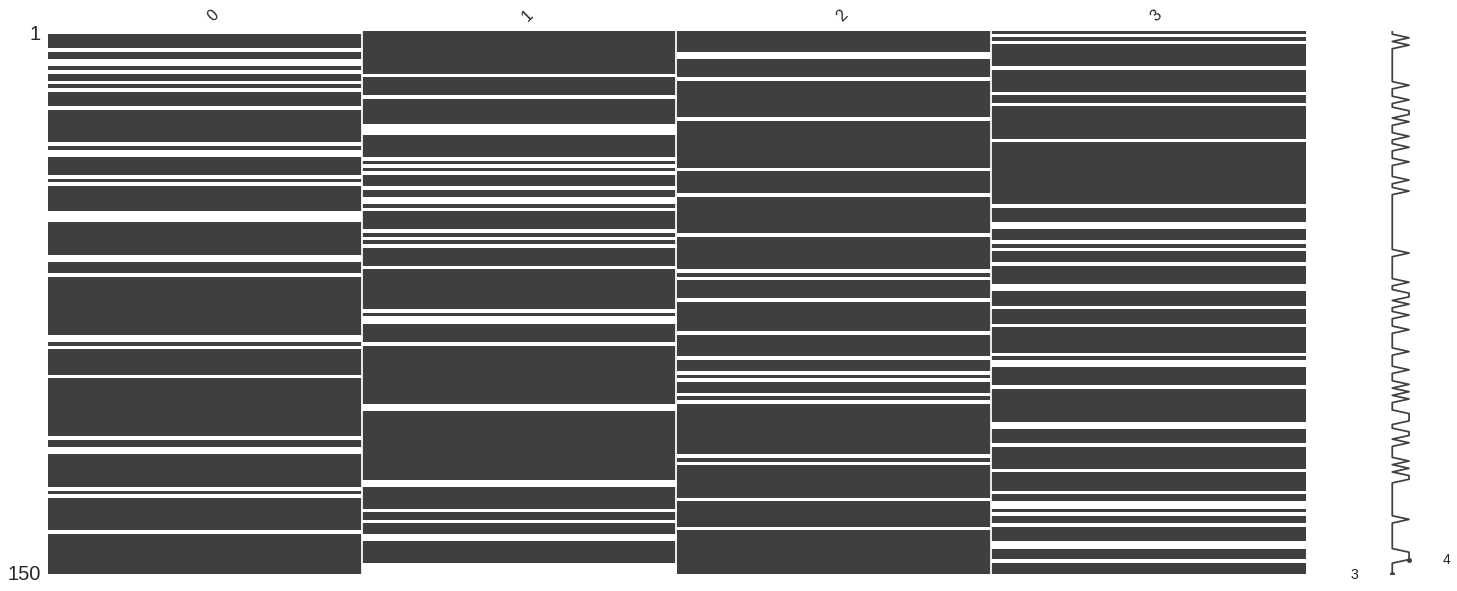

In [13]:
#---------------------------------------------------------------------------
# loading dataset Iris
#---------------------------------------------------------------------------
iris = pd.read_csv("/home/owner/workspace/datasets/iris.csv", encoding='UTF-8')

# Change categorical data to number 0-2
iris["species"] = pd.Categorical(iris["species"])
iris["species"] = iris["species"].cat.codes

#---------------------------------------------------------------------------
# Calling the Comparison Function based on the selected database 
#---------------------------------------------------------------------------
get_ComparisonDecisionTree(iris)

## Loading Dataset - Binary Classification (Mammographic)

Original Values, no data manipulation prior to this step

 
Classification Results for Baseline
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       126
           1       0.83      0.71      0.76       123

    accuracy                           0.78       249
   macro avg       0.79      0.78      0.78       249
weighted avg       0.79      0.78      0.78       249



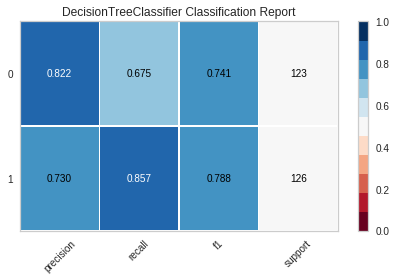

--------------------------------------------------------------------------------
Confusion Matrix


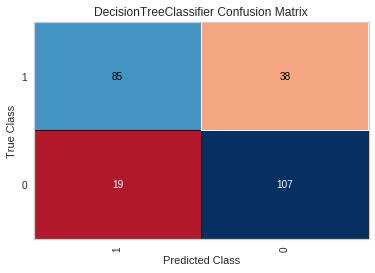

--------------------------------------------------------------------------------
Class Prediction Error Distribution


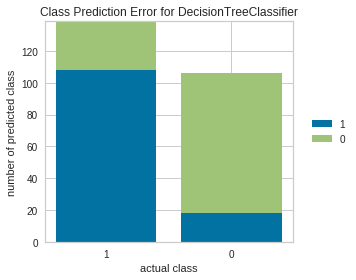

--------------------------------------------------------------------------------
Precision-Recall Curves


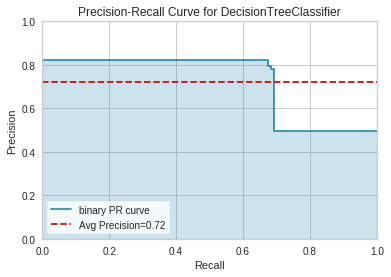

 
 
Classification Results with Missing Values
 
 
Stategy 1 - Constant Imputation (=zero)
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       161
           1       0.75      0.71      0.73       128

    accuracy                           0.76       289
   macro avg       0.76      0.76      0.76       289
weighted avg       0.76      0.76      0.76       289



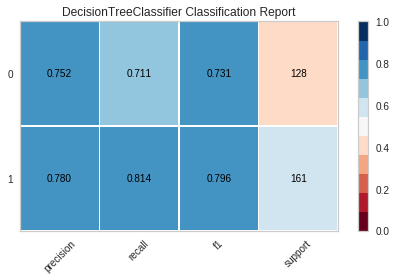

--------------------------------------------------------------------------------
Confusion Matrix


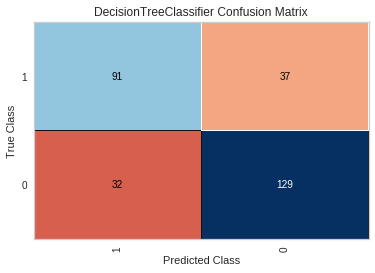

--------------------------------------------------------------------------------
Class Prediction Error Distribution


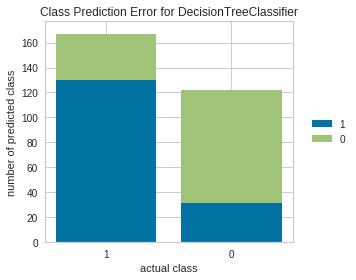

--------------------------------------------------------------------------------
Precision-Recall Curves


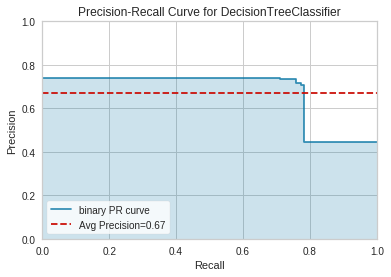

 
Stategy 2 - Mean Imputation
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       161
           1       0.75      0.70      0.72       128

    accuracy                           0.76       289
   macro avg       0.76      0.76      0.76       289
weighted avg       0.76      0.76      0.76       289



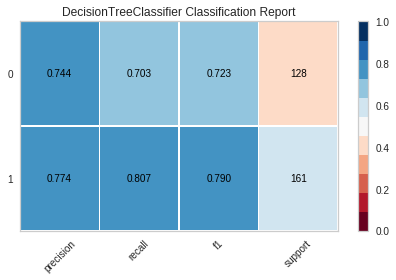

--------------------------------------------------------------------------------
Confusion Matrix


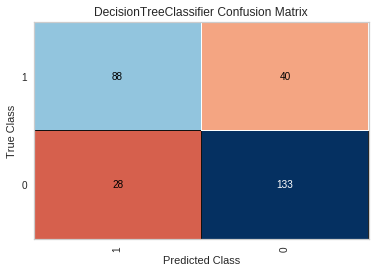

--------------------------------------------------------------------------------
Class Prediction Error Distribution


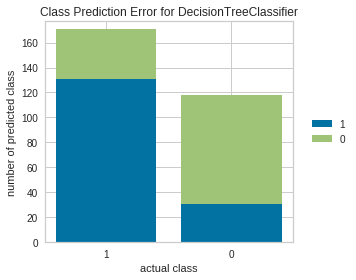

--------------------------------------------------------------------------------
Precision-Recall Curves


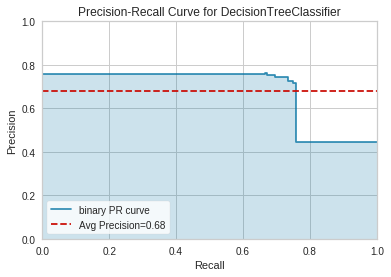

 
Strategy 3 - Median Imputation
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       161
           1       0.76      0.65      0.70       128

    accuracy                           0.75       289
   macro avg       0.76      0.74      0.75       289
weighted avg       0.76      0.75      0.75       289



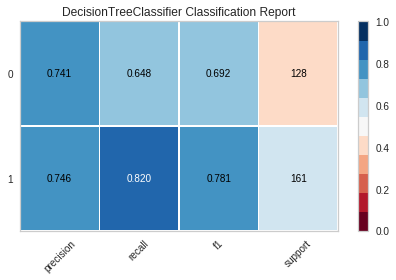

--------------------------------------------------------------------------------
Confusion Matrix


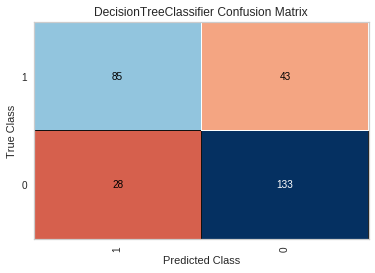

--------------------------------------------------------------------------------
Class Prediction Error Distribution


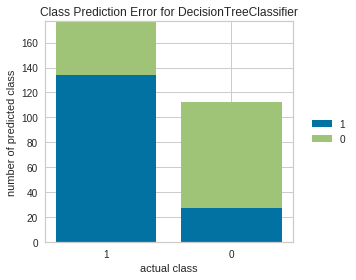

--------------------------------------------------------------------------------
Precision-Recall Curves


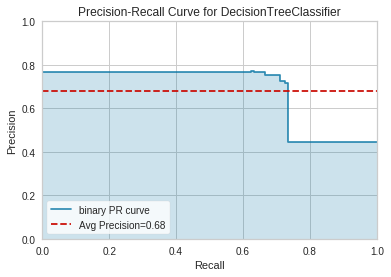

 
Strategy 4 - Most Frequent Imputation
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       161
           1       0.77      0.69      0.72       128

    accuracy                           0.77       289
   macro avg       0.77      0.76      0.76       289
weighted avg       0.77      0.77      0.77       289



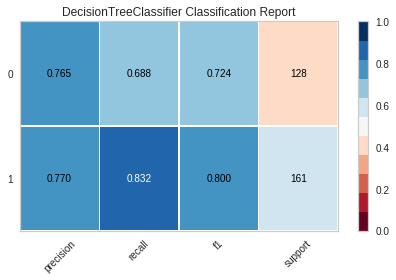

--------------------------------------------------------------------------------
Confusion Matrix


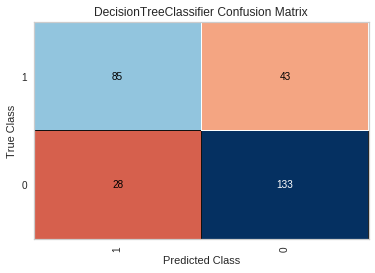

--------------------------------------------------------------------------------
Class Prediction Error Distribution


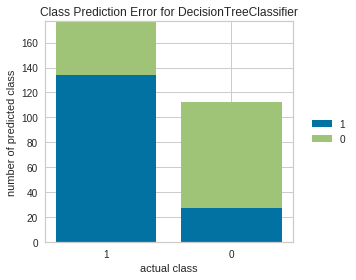

--------------------------------------------------------------------------------
Precision-Recall Curves


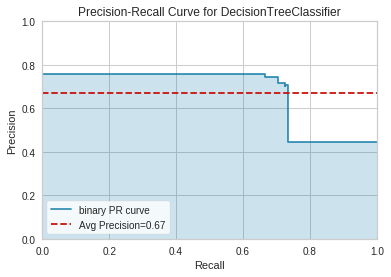

 
 
Matrix visualization of the nullity of the given dataset


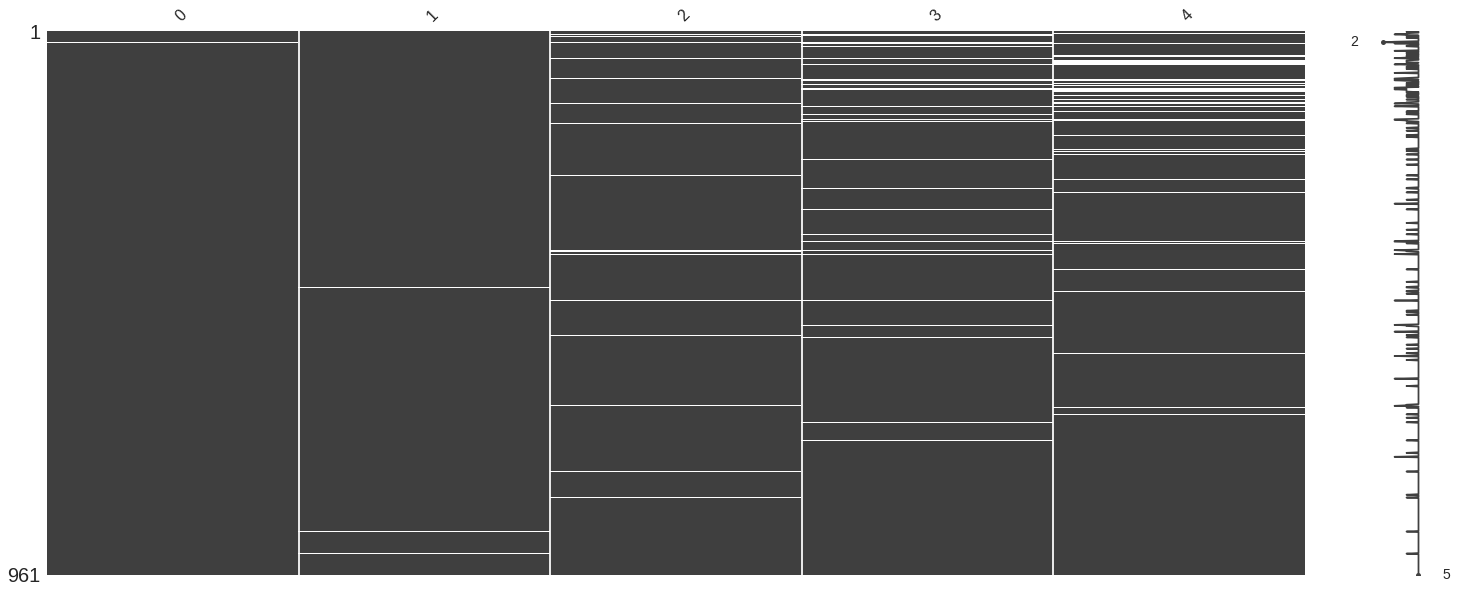

In [14]:
#---------------------------------------------------------------------------
# loading dataset Mamographic
#---------------------------------------------------------------------------

df = pd.read_csv("/home/owner/workspace/datasets/mammographic_masses2.csv", encoding='UTF-8')

X_full = np.array(df.iloc[:,:-1])
y_full = np.array(df.iloc[:,-1])  

#---------------------------------------------------------------------------
# Calling the Comparison Function based on the selected database 
#---------------------------------------------------------------------------
get_ComparisonDecisionTree(df)
